In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import plotly.graph_objects as go

#func

In [2]:
def analyze_xrd_data(filename, w, peak_ranges):

    #  CSV file
    data = pd.read_excel(filename + '.xlsx', sheet_name='Sheet1')
    data=data.iloc[1000:2385,:]

    # 2-theta and intensity
    theta = data.iloc[:, 0].values
    intensity = data.iloc[:, 1]
    intensity -= w

    # Gaussian function
    def gaussian(x, A, mu, sigma, n):
        return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + n

    # Define colors for fitted curves
    colors = ['midnightblue', 'forestgreen', 'chocolate', 'darkmagenta', 'red', 'magenta']

    # Perform curve fitting for each peak
    plt.figure(figsize=(10, 6))
    plt.plot(theta, intensity, label='Experimental Data', color='cornflowerblue')

    fwhm_list = []
    peak_positions = []

    for i, (peak_range, sigma, n, amplitude) in enumerate(peak_ranges):
        mask = (theta >= peak_range[0]) & (theta <= peak_range[1])
        p0 = (amplitude, np.mean(peak_range), sigma, n)  # Initial guess for fitting

        try:
            peak_x = theta[mask]
            peak_y = gaussian(peak_x, *p0)

            # Plot fitted curve with Matplotlib
            plt.plot(peak_x, peak_y, label=f'Peak {i + 1}', color=colors[i])

            # Calculate FWHM
            fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma
            fwhm_list.append(fwhm)

            # Find maximum intensity and corresponding 2-theta
            max_intensity = np.max(peak_y)
            max_intensity_index = np.argmax(peak_y)
            max_2theta = peak_x[max_intensity_index]
            peak_positions.append((max_2theta, max_intensity))
        except RuntimeError:
            print(f"Failed to fit Gaussian for peak range {peak_range}")



    # Add labels and legend to the static plot
    plt.xlabel('2-Theta')
    plt.ylabel('Intensity')
    plt.legend()
    plt.title('XRD Data with Fitted Gaussian Peaks')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Save static plot
    plt.savefig(filename + '_static_plot.png')

    # Close Matplotlib plot
    plt.close()

    #  trace for experimental data
    trace_exp = go.Scatter(x=theta, y=intensity, mode='lines', name='Experimental Data', line=dict(color='cornflowerblue'))

    # Initialize data list for traces
    data = [trace_exp]

    for i, (peak_range, sigma, n, amplitude) in enumerate(peak_ranges):
        mask = (theta >= peak_range[0]) & (theta <= peak_range[1])
        p0 = (amplitude, np.mean(peak_range), sigma, n)  # Initial guess for fitting

        try:
            peak_x = theta[mask]
            peak_y = gaussian(peak_x, *p0)

            #  trace for fitted curve
            trace_fit = go.Scatter(x=peak_x, y=peak_y, mode='lines', name=f'Peak {i + 1}', line=dict(color=colors[i]))
            data.append(trace_fit)
        except RuntimeError:
            print(f"Failed to fit Gaussian for peak range {peak_range}")

    #  layout for Plotly plot
    layout = go.Layout(
        title='XRD Data with Fitted Gaussian Peaks',
        xaxis=dict(title='2-Theta'),
        yaxis=dict(title='Intensity'),
        legend=dict(orientation='h', x=0.5, y=-0.2)
    )

    #  Plotly figure
    fig = go.Figure(data=data, layout=layout)
    fig.show()

    # Save interactive plot
    fig.write_html(filename + '_interactive_plot.html')

    # Output data
    data = {'FWHM {}'.format(i + 1): fwhm_list[i] if i < len(fwhm_list) else np.nan for i in range(6)}
    data.update({'2-theta {}'.format(i + 1): peak_positions[i][0] if i < len(peak_positions) else np.nan for i in range(6)})
    data.update({'Intensity {}'.format(i + 1): peak_positions[i][1] if i < len(peak_positions) else np.nan for i in range(6)})

    #
    df = pd.DataFrame(data, index=[filename])

    return df

#sample1

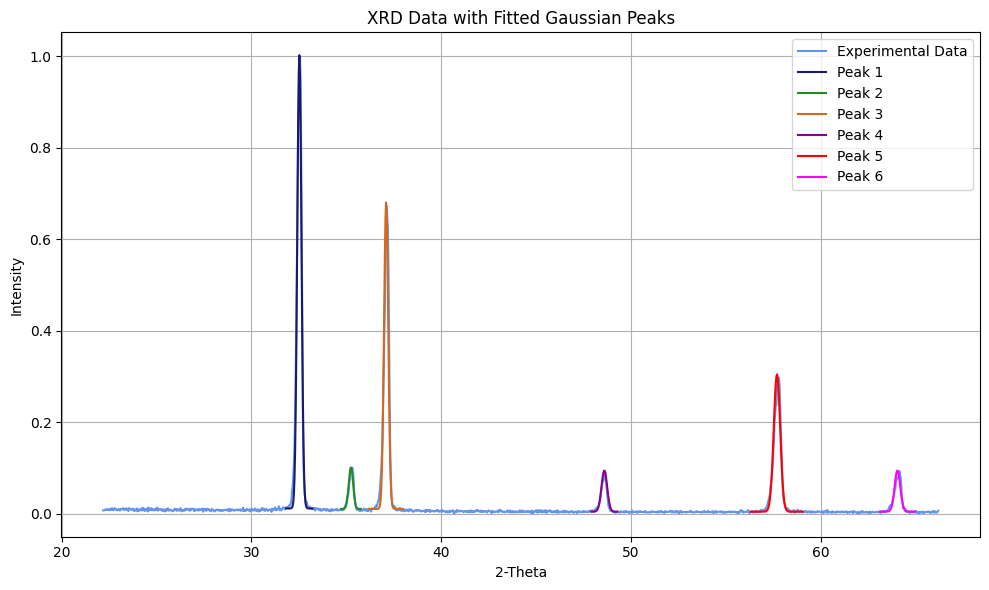

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample1,0.25903,0.270804,0.25903,0.353223,0.400319,0.353223,32.52539,35.258973,37.095223,48.586384,57.704742,64.03641,1.001994,0.101331,0.680368,0.09463,0.304883,0.094631


In [4]:
peak_ranges = [

((31.8, 33.25), 0.11, 0.012, 0.99),

((34.7, 35.79), 0.115, 0.011, 0.091),

((36.2, 38.), 0.11, 0.011, 0.67),

((47.9, 49.3), 0.15, 0.005, 0.09),

 ((56.3, 59.1), 0.17, 0.005, 0.3),

((63.1, 65), 0.15, 0.005, 0.09)]

#peak_range, sigma, n, amplitude

df1 = analyze_xrd_data("sample1", 0, peak_ranges)
df1

#sample2

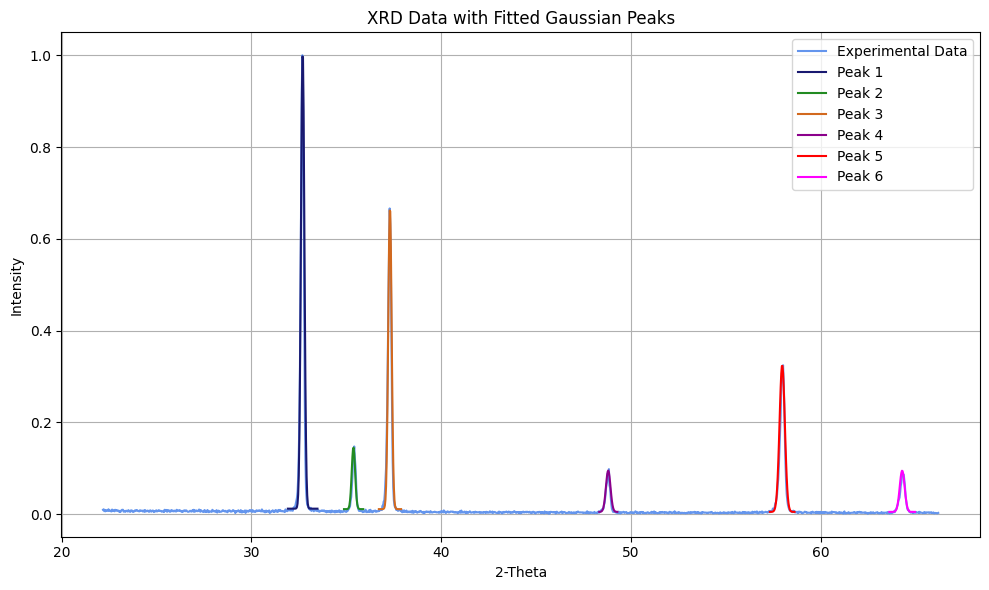

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample2,0.211934,0.211934,0.211934,0.282578,0.329675,0.306127,32.684563,35.385823,37.284958,48.809005,57.990251,64.288134,0.997398,0.145027,0.661846,0.09495,0.323107,0.094626


In [5]:
peak_ranges = [

((31.9, 33.5), 0.09, 0.012, 1),

((34.85, 35.9), 0.09, 0.011, 0.135),

((36.7, 37.9), 0.09, 0.011, 0.66),

((48.3, 49.31), 0.12, 0.005, 0.09),

 ((57.3, 58.65), 0.14, 0.005, 0.32),

((63.6, 65), 0.13, 0.005, 0.09)]

#peak_range, sigma, n, amplitude

df2 = analyze_xrd_data("sample2", 1 , peak_ranges)
df2

#sample3

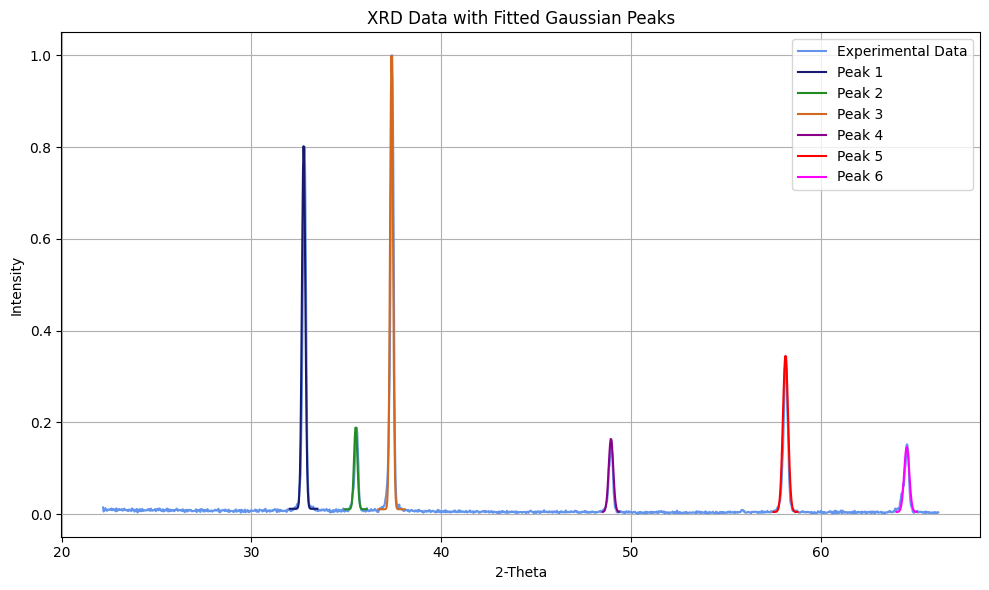

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample3,0.211934,0.211934,0.188386,0.282578,0.324965,0.317901,32.748227,35.480939,37.379827,48.936157,58.148967,64.539587,0.801847,0.188816,0.998933,0.163939,0.34499,0.146999


In [6]:
peak_ranges = [

((32, 33.5), 0.09, 0.012, 0.79),

((34.89, 36.1), 0.09, 0.011, 0.18),

((36.67, 38.1), 0.08, 0.011, 0.99),

((48.5, 49.4), 0.12, 0.005, 0.16),

 ((57.5, 58.8), 0.138, 0.005, 0.34),

((64, 65.08), 0.135, 0.005, 0.142)]

#peak_range, sigma, n, amplitude

df3 = analyze_xrd_data("sample3", 2 , peak_ranges)
df3

#sample4

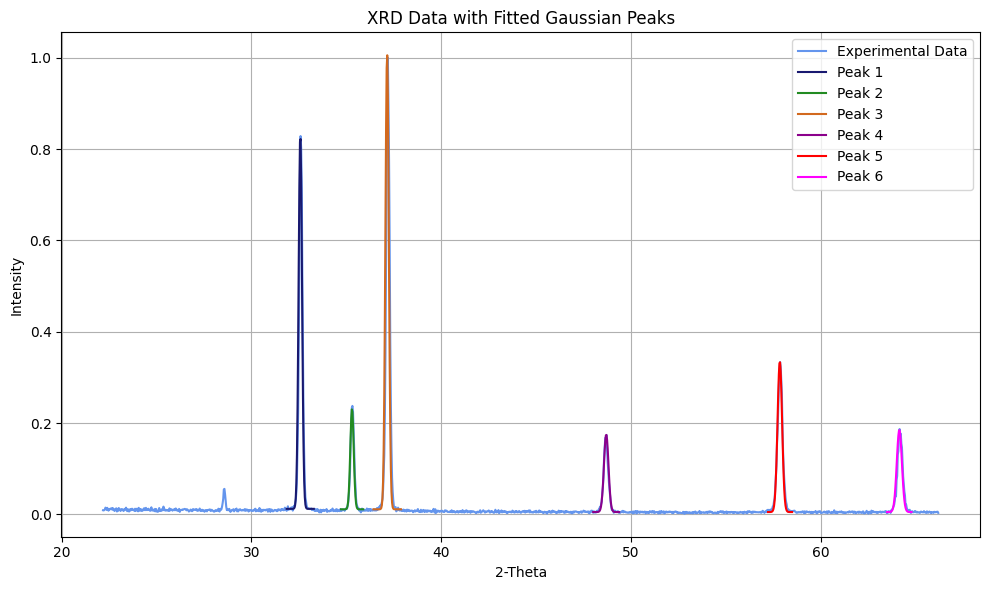

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample4,0.211934,0.211934,0.211934,0.282578,0.282578,0.317901,32.589062,35.290689,37.158468,48.713613,57.863325,64.162305,0.822052,0.229826,1.005588,0.17391,0.332972,0.184254


In [7]:
peak_ranges = [

((31.85, 33.3), 0.09, 0.012, 0.82),

((34.7, 35.9), 0.09, 0.011, 0.22),

((36.4, 37.9), 0.09, 0.011, 0.999),



((48, 49.4), 0.12, 0.005, 0.17),

 ((57.2, 58.5), 0.12, 0.005, 0.33),

((63.5, 64.8), 0.135, 0.005, 0.18)]

#peak_range, sigma, n, amplitude

df4 = analyze_xrd_data("sample4", 3 , peak_ranges)
df4

#sample5

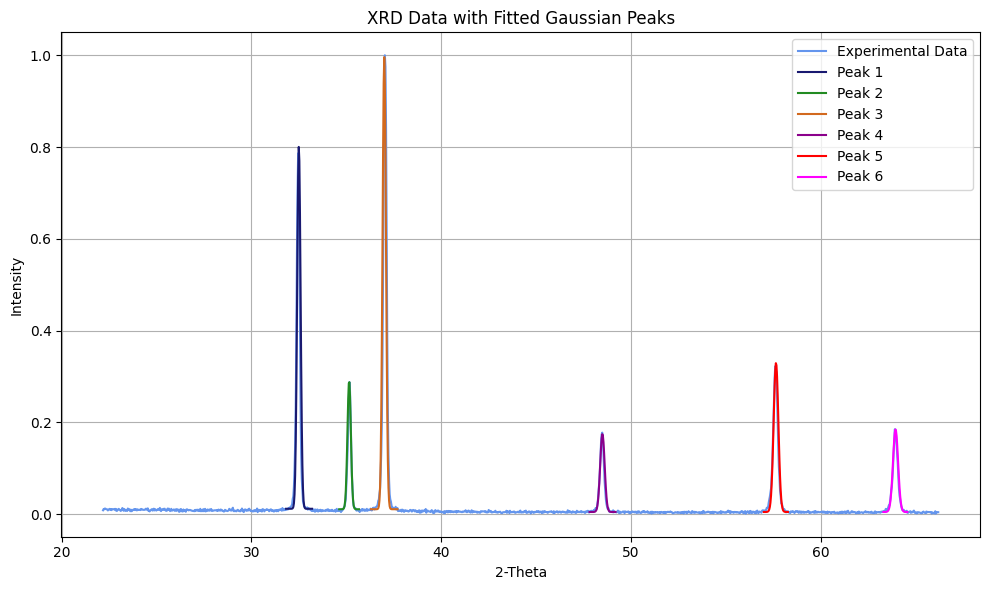

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample5,0.211934,0.211934,0.211934,0.277869,0.294353,0.317901,32.493553,35.163814,37.000353,48.49093,57.641337,63.941948,0.800277,0.287721,0.995992,0.174499,0.329221,0.18468


In [8]:
peak_ranges = [

((31.799, 33.2), 0.09, 0.012, 0.79),

((34.6, 35.7), 0.09, 0.011, 0.28),

((36.3, 37.7), 0.09, 0.011, 0.985),



((47.8, 49.2), 0.118, 0.005, 0.17),

 ((57, 58.3), 0.125, 0.005, 0.325),

((63.3, 64.6), 0.135, 0.005, 0.18)]

#peak_range, sigma, n, amplitude

df5 = analyze_xrd_data("sample5", 4 , peak_ranges)
df5

#data

*   concate
*   calculate relative intesity , Sherer parameter



In [18]:
output=pd.concat([df1,df2,df3,df4,df5])

In [19]:
output

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample1,0.259030,0.270804,0.259030,0.353223,0.400319,0.353223,32.525390,35.258973,37.095223,48.586384,57.704742,64.036410,1.001994,0.101331,0.680368,0.094630,0.304883,0.094631
sample2,0.211934,0.211934,0.211934,0.282578,0.329675,0.306127,32.684563,35.385823,37.284958,48.809005,57.990251,64.288134,0.997398,0.145027,0.661846,0.094950,0.323107,0.094626
sample3,0.211934,0.211934,0.188386,0.282578,0.324965,0.317901,32.748227,35.480939,37.379827,48.936157,58.148967,64.539587,0.801847,0.188816,0.998933,0.163939,0.344990,0.146999
sample4,0.211934,0.211934,0.211934,0.282578,0.282578,0.317901,32.589062,35.290689,37.158468,48.713613,57.863325,64.162305,0.822052,0.229826,1.005588,0.173910,0.332972,0.184254
sample5,0.211934,0.211934,0.211934,0.277869,0.294353,0.317901,32.493553,35.163814,37.000353,48.490930,57.641337,63.941948,0.800277,0.287721,0.995992,0.174499,0.329221,0.184680


In [20]:
#relative intensity


max_intensity = output.iloc[:, 12:].max(axis=1)

# Divide all intensities by the maximum intensity and multiply by 100
normalized_intensities = (output.iloc[:, 12:].div(max_intensity, axis=0)) * 100

# Add relative intensities to the output DataFrame
for i in range(6):
    output[f'Relative Intensity {i+1}'] = normalized_intensities.iloc[:, i]


In [21]:
#theta

for i in range(1, 7):  # 6 peaks
    theta_col = f'2-theta {i}'

    output[f'Theta_{i}'] = output[theta_col] / 2

In [22]:
def cos_degrees(angle_degrees):
    angle_radians = math.radians(angle_degrees)
    return math.cos(angle_radians)

cos_theta_cols = output[['Theta_1', 'Theta_2', 'Theta_3', 'Theta_4', 'Theta_5', 'Theta_6']].applymap(cos_degrees)

output = pd.concat([output, cos_theta_cols.add_prefix('Cos_')], axis=1)




#  calculate Sherer parameter

def calculate_sherer(fwhm, cos_theta, lamda, k):
    return k * lamda / (fwhm * cos_theta)

#  calculate dislocation density
def calculate_dislocation_density(sherer):
    return 1 / sherer**2


# Constants
lamda = 1.54  # Wavelength in Angstrom
k = 0.089  # Constant


#  Sherer parameter for each peak
for i in range(1, 7):
    fwhm_col = f'FWHM {i}'
    cos_theta_col = f'Cos_Theta_{i}'
    sherer_col = f'Sherer_{i}'
    dislocation_density_col = f'Dislocation_Density_{i}'

    output[sherer_col] = calculate_sherer(output[fwhm_col], output[cos_theta_col], lamda, k)
    output[dislocation_density_col] = calculate_dislocation_density(output[sherer_col])



In [23]:
output

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,...,Sherer_2,Dislocation_Density_2,Sherer_3,Dislocation_Density_3,Sherer_4,Dislocation_Density_4,Sherer_5,Dislocation_Density_5,Sherer_6,Dislocation_Density_6
sample1,0.259030,0.270804,0.259030,0.353223,0.400319,0.353223,32.525390,35.258973,37.095223,48.586384,...,0.531063,3.545743,0.558116,3.210338,0.425724,5.517525,0.390901,6.544359,0.457644,4.774688
sample2,0.211934,0.211934,0.211934,0.282578,0.329675,0.306127,32.684563,35.385823,37.284958,48.809005,...,0.678820,2.170154,0.682522,2.146676,0.532623,3.525012,0.475319,4.426185,0.528778,3.576458
sample3,0.211934,0.211934,0.188386,0.282578,0.324965,0.317901,32.748227,35.480939,37.379827,48.936157,...,0.679000,2.169003,0.768052,1.695191,0.532891,3.521459,0.482579,4.294018,0.509898,3.846213
sample4,0.211934,0.211934,0.211934,0.282578,0.282578,0.317901,32.589062,35.290689,37.158468,48.713613,...,0.678641,2.171302,0.682269,2.148272,0.532422,3.527673,0.554199,3.255880,0.508843,3.862180
sample5,0.211934,0.211934,0.211934,0.277869,0.294353,0.317901,32.493553,35.163814,37.000353,48.490930,...,0.678402,2.172829,0.681953,2.150262,0.540971,3.417055,0.531463,3.540413,0.508231,3.871482


In [24]:

custom_order = ['FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5', 'FWHM 6',
    '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4', '2-theta 5', '2-theta 6',
    'Intensity 1', 'Intensity 2', 'Intensity 3', 'Intensity 4', 'Intensity 5', 'Intensity 6',
    'Relative Intensity 1', 'Relative Intensity 2', 'Relative Intensity 3',
    'Relative Intensity 4', 'Relative Intensity 5', 'Relative Intensity 6',
    'Theta_1', 'Theta_2', 'Theta_3', 'Theta_4', 'Theta_5', 'Theta_6',
    'Cos_Theta_1', 'Cos_Theta_2', 'Cos_Theta_3', 'Cos_Theta_4', 'Cos_Theta_5', 'Cos_Theta_6',
    'Sherer_1', 'Sherer_2', 'Sherer_3', 'Sherer_4', 'Sherer_5', 'Sherer_6',
    'Dislocation_Density_1', 'Dislocation_Density_2', 'Dislocation_Density_3',
    'Dislocation_Density_4', 'Dislocation_Density_5', 'Dislocation_Density_6'
]

output = output.reindex(columns=custom_order)


In [25]:
output

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,...,Sherer_3,Sherer_4,Sherer_5,Sherer_6,Dislocation_Density_1,Dislocation_Density_2,Dislocation_Density_3,Dislocation_Density_4,Dislocation_Density_5,Dislocation_Density_6
sample1,0.259030,0.270804,0.259030,0.353223,0.400319,0.353223,32.525390,35.258973,37.095223,48.586384,...,0.558116,0.425724,0.390901,0.457644,3.291629,3.545743,3.210338,5.517525,6.544359,4.774688
sample2,0.211934,0.211934,0.211934,0.282578,0.329675,0.306127,32.684563,35.385823,37.284958,48.809005,...,0.682522,0.532623,0.475319,0.528778,2.201697,2.170154,2.146676,3.525012,4.426185,3.576458
sample3,0.211934,0.211934,0.188386,0.282578,0.324965,0.317901,32.748227,35.480939,37.379827,48.936157,...,0.768052,0.532891,0.482579,0.509898,2.200979,2.169003,1.695191,3.521459,4.294018,3.846213
sample4,0.211934,0.211934,0.211934,0.282578,0.282578,0.317901,32.589062,35.290689,37.158468,48.713613,...,0.682269,0.532422,0.554199,0.508843,2.202772,2.171302,2.148272,3.527673,3.255880,3.862180
sample5,0.211934,0.211934,0.211934,0.277869,0.294353,0.317901,32.493553,35.163814,37.000353,48.490930,...,0.681953,0.540971,0.531463,0.508231,2.203844,2.172829,2.150262,3.417055,3.540413,3.871482


In [26]:
output.to_excel('output.xlsx')